<a href="https://colab.research.google.com/github/soumeyademil/EDA-Trending-Ytb-Videos/blob/main/EDA_Trending_Ytb_Videos_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download Data 
The first step is to download our data from Kaggle to the drive.

In [111]:
from google.colab import drive
drive._mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We have now to create a new API token from **Kaggle >> Account >> API >> Create New API Token**. A file named 'kaggle.json' will be downloaded. We must upload this file inside the folder '/content/drive/MyDrive/Kaggle'.

In [112]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"
%cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [113]:
# !kaggle datasets download -d datasnaek/youtube-new

In [114]:
# !unzip \*.zip  && rm *.zip

### Data cleaning

In [115]:
import pandas as pd
import numpy as np

In [116]:
file_name = '/content/drive/MyDrive/Kaggle/youtube-new/USvideos.csv'
ytb_df = pd.read_csv(file_name)

In [117]:
ytb_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [118]:
print(f'The dataset "US Videos" contains {len(ytb_df)} record.')

The dataset "US Videos" contains 40949 record.


In [119]:
ytb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

The dataframe has 16 columns (including video_id column) with:


*   5 columns 'int64'.
*   3 columns 'bool'.
*   8 columns 'object'.



In [120]:
ytb_df['trending_date'] = ytb_df['trending_date'].str.replace('.','/')
ytb_df['trending_date'] = pd.to_datetime(ytb_df['trending_date'], format='%y/%d/%m')

ytb_df['publish_time'] = pd.to_datetime(ytb_df['publish_time'], format='%Y-%m-%dT%H:%M:%S.000Z')
ytb_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [121]:
import json
 
with open('/content/drive/MyDrive/Kaggle/youtube-new/US_category_id.json') as json_file:
    json_data = json.load(json_file)

print('Ratrieved JSON data keys... ', json_data.keys())

category_list = json_data['items']
print('Categories list length...\n', len(category_list))
category_dict = {el['id']:el['snippet']['title'] for el in category_list}
category_dict

Ratrieved JSON data keys...  dict_keys(['kind', 'etag', 'items'])
Categories list length...
 32


{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [122]:
ytb_df.category_id.unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43])

In [123]:
ytb_df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


### Data exploration
In this section, we will answer the following questions:


*   What is the category that has the biggest number of trending videos within a given period?
*   Is it possible that a trending video has no likes? Has more dislikes than likes?
*   
*   List item







In [124]:
# cat_df = ytb_df.groupby('category_id').agg({
#     'video_id': 'count',
#     'views': ['min', 'max', 'sum'],
#     'likes': ['min', 'max', 'sum'],
#     'dislikes': ['min', 'max', 'sum'],
#     'trending_date': ['min', 'max'],  # To make sure it's approx the same period of time for all categories
# })

cat_df = ytb_df.groupby('category_id').agg(
    video_count = ('video_id', 'count'),
    
    views_min = ('views', 'min'),
    views_max = ('views', 'max'),
    views_sum = ('views', 'sum'),

    likes_min = ('likes', 'min'),
    likes_max = ('likes', 'max'),
    likes_sum = ('likes', 'sum'),

    dislikes_min = ('dislikes', 'min'),
    dislikes_max = ('dislikes', 'max'),
    dislikes_sum = ('dislikes', 'sum'),

    date_min = ('trending_date', 'min'),
    date_max = ('trending_date', 'max'),  # To make sure it's approx the same period of time for all categories
)

cat_df.reset_index(inplace=True)

cat_df['category_name'] = cat_df['category_id'].apply(lambda id: category_dict[str(id)])
cat_df

,category_id,video_count,views_min,views_max,views_sum,likes_min,likes_max,likes_sum,dislikes_min,dislikes_max,dislikes_sum,date_min,date_max,category_name
0,1,2345,943,54863912,7284156721,0,922355,165997476,0,38082,6075148,2017-11-14,2018-06-14,Film & Animation
1,2,384,2860,25244097,520690717,0,97030,4245656,0,12290,243010,2017-11-14,2018-05-21,Autos & Vehicles
2,10,6472,1591,225211923,40132892190,0,5613827,1416838584,0,343541,51179008,2017-11-14,2018-06-14,Music
3,15,920,3393,6187457,764651989,6,178243,19370702,0,4899,527379,2017-11-14,2018-06-14,Pets & Animals
4,17,2174,658,29090799,4404456673,0,1121217,98621211,0,176903,5133551,2017-11-14,2018-06-14,Sports
5,19,402,789,23932421,343557084,3,42447,4836246,0,9000,340427,2017-11-14,2018-06-14,Travel & Events
6,20,817,1237,16935442,2141218625,2,444203,69038284,0,212976,9184466,2017-11-14,2018-06-14,Gaming
7,22,3210,884,56111957,4917191726,0,2032463,186615999,0,228426,10187901,2017-11-14,2018-06-14,People & Blogs
8,23,3457,1807,29178096,5117426208,6,865679,216346746,0,29865,7230391,2017-11-14,2018-06-14,Comedy
9,24,9964,798,149376127,20604388195,0,3093544,530516491,0,1674420,42987663,2017-11-14,2018-06-14,Entertainment


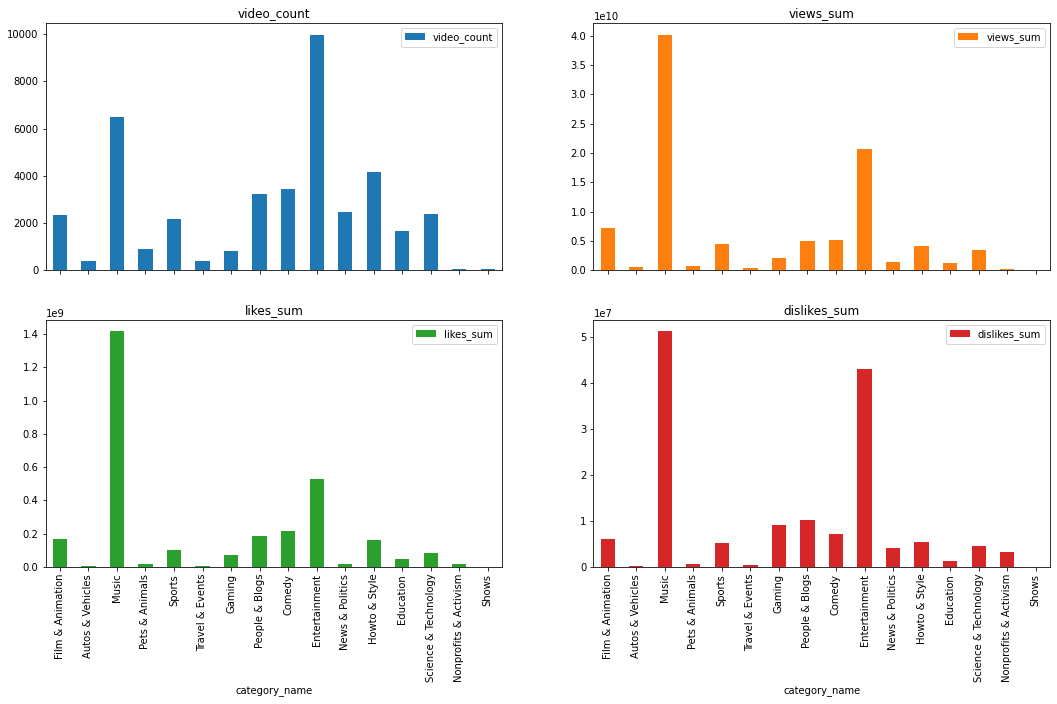

In [125]:
axes = cat_df.plot.bar(rot=90, subplots=True, layout=(2, 2), x='category_name', y=['video_count', 'views_sum', 'likes_sum', 'dislikes_sum'], figsize=(18, 10))

# axes[0].set_xticklabels(cat_df['category_name'], rotation=90)
# axes[0].set_yticklabels(cat_df['video_count'])
# axes[0].plot()

# axes[1].set_xticklabels(cat_df['category_name'], rotation=90)
# axes[1].set_yticklabels(cat_df['views_sum'])
# axes[1].plot()

In [126]:
# Get number of channels that appear in our dataframe
trd_channel_set = ytb_df['channel_title'].unique()
len(trd_channel_set)

2207

In [127]:
# Get frequency (or number of videos) for each channel title
channel_freq = ytb_df.groupby('channel_title').agg(
    videos_number = ('video_id', 'count')
)

channel_freq.sort_values(by='videos_number', ascending=False, inplace=True)
channel_freq.reset_index(inplace=True)
channel_freq.head(10)

,channel_title,videos_number
0,ESPN,203
1,The Tonight Show Starring Jimmy Fallon,197
2,Vox,193
3,Netflix,193
4,TheEllenShow,193
5,The Late Show with Stephen Colbert,187
6,Jimmy Kimmel Live,186
7,Late Night with Seth Meyers,183
8,Screen Junkies,182
9,NBA,181


We'll now see if there is a correlation between variables.

In [128]:
# Get correlation between views and likes
corr_views_likes = ytb_df['views'].corr(ytb_df['likes'])
corr_views_dislikes = ytb_df['views'].corr(ytb_df['dislikes'])
corr_views_comments = ytb_df['views'].corr(ytb_df['comment_count'])

corr_views_likes.round(3), corr_views_dislikes.round(3), corr_views_comments.round(3)

(0.849, 0.472, 0.618)

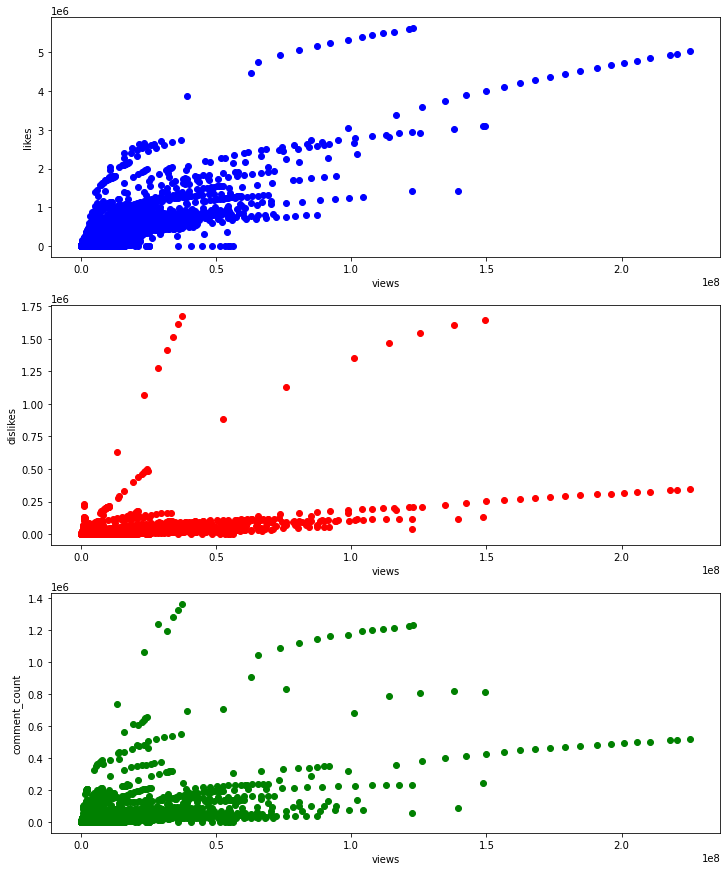

In [131]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

ax1.scatter(x=ytb_df['views'], y=ytb_df['likes'], c='b')
ax1.set_xlabel("views")
ax1.set_ylabel("likes")

ax2.scatter(x=ytb_df['views'], y=ytb_df['dislikes'], c='r')
ax2.set_xlabel("views")
ax2.set_ylabel("dislikes")

ax3.scatter(x=ytb_df['views'], y=ytb_df['comment_count'], c='g')
ax3.set_xlabel("views")
ax3.set_ylabel("comment_count")

plt.show()

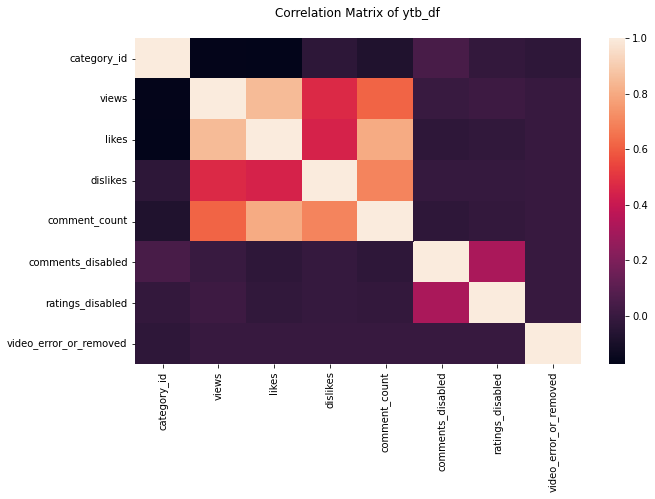

In [133]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

import seaborn as sns

# calculate the correlation matrix
corr = ytb_df.corr()

# plot the heatmap
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(
        corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="rocket"
)
plt.title('Correlation Matrix of ytb_df\n')
plt.show()